In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set()
warnings.filterwarnings("ignore")

In [2]:
bank = pd.read_csv('Bank_Clean.csv')

In [3]:
bank

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y,age_group,pdays_group
0,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,0,no,55-64,Not Previous Contacted
1,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,no,35-44,Not Previous Contacted
2,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,no,25-34,Not Previous Contacted
3,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,0,no,35-44,Not Previous Contacted
4,management,single,tertiary,no,447,yes,yes,cellular,5,may,217,1,0,no,25-34,Not Previous Contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,yes,45-54,Not Previous Contacted
43189,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,yes,65+,Not Previous Contacted
43190,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,yes,65+,144 to 282 days
43191,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,no,55-64,Not Previous Contacted


In [4]:
bank_desc = bank.describe()
bank_desc.loc['IQR'] = bank_desc.loc['75%'] - bank_desc.loc['25%']
bank_desc.loc['Range'] = bank_desc.loc['max'] - bank_desc.loc['min']
bank_desc.loc['Variance'] = bank_desc.loc['std'] ** 2
bank_desc.loc['High_Out_IQR'] = bank_desc.loc['75%'] + (bank_desc.loc['IQR'] * 1.5)
bank_desc.loc['Low_Out_IQR'] = bank_desc.loc['25%'] - (bank_desc.loc['IQR'] * 1.5)
bank_desc

,balance,day,duration,campaign,previous
count,4.319300e+04,43193.000000,43193.000000,43193.000000,43193.000000
mean,1.354027e+03,15.809414,258.323409,2.758178,0.584863
std,3.042104e+03,8.305970,258.162006,3.063987,2.332672
min,-8.019000e+03,1.000000,0.000000,1.000000,0.000000
25%,7.100000e+01,8.000000,103.000000,1.000000,0.000000
50%,4.420000e+02,16.000000,180.000000,2.000000,0.000000
75%,1.412000e+03,21.000000,318.000000,3.000000,0.000000
max,1.021270e+05,31.000000,4918.000000,58.000000,275.000000
IQR,1.341000e+03,13.000000,215.000000,2.000000,0.000000
Range,1.101460e+05,30.000000,4918.000000,57.000000,275.000000


In [5]:
bank['Open_Deposit'] = bank['y']

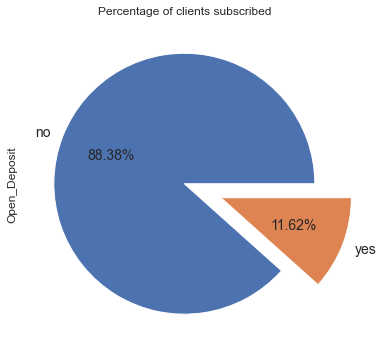

In [6]:
plt.figure(figsize=(6,6))
bank['Open_Deposit'].value_counts().plot.pie(explode=[0, 0.3], autopct='%1.2f%%', fontsize=14)
plt.title('Percentage of clients subscribed')
plt.show()

<p> From this chart, we can show that this dataset is extremely unbalanced. </p>

## Conversion by Categorical Column

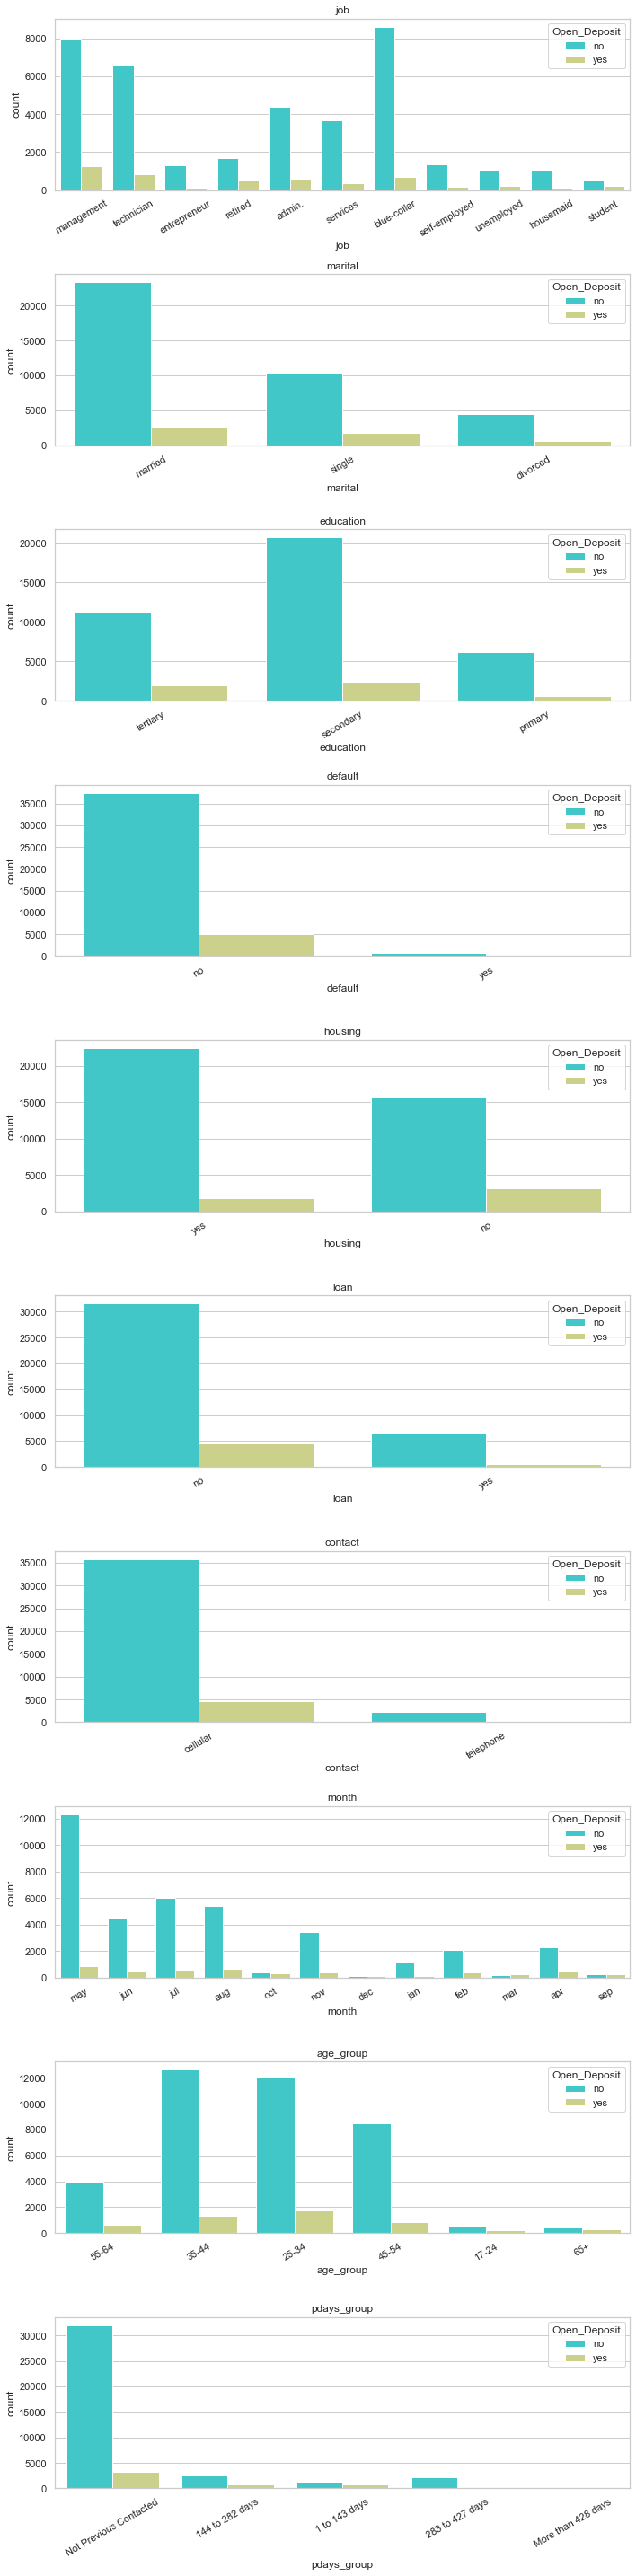

In [7]:
sns.set_style('whitegrid')
obj_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'age_group', 'pdays_group']
fig, ax = plt.subplots(10, 1, figsize=(10, 40))
for i, obj in enumerate(obj_col):
    sns.countplot(obj, data=bank, hue='Open_Deposit', ax=ax[i], palette='rainbow')
    ax[i].tick_params(axis='x', rotation=30)
    ax[i].set_title(obj)
    plt.tight_layout()

From the charts above we can draw these conclusions:
<li>Banks will more than likely market to new customers rather than keep their current customers.  The pdaysgroup count plot shows the majority of customers are new customers or ones who have not been contacted before.</li>
<li>Customers who do not have loans are more likely to open an account than those who do have loans.</li>
<li>Customers who have defaulted on credit cards, loans, etc. are less likely to open another account than those who have not defaulted.</li>

In [8]:
bank['Deposit'] = bank['y'].apply(lambda x : 1 if x == 'yes' else 0)

### Conversion by Campaign

In [9]:
Subscribed_per_campaign = bank.groupby(by='campaign')['Deposit'].sum()

In [10]:
Approach_per_campaign = bank.groupby(by='campaign')['Deposit'].count()

In [11]:
Subs_per_campaign = pd.concat([Subscribed_per_campaign, Approach_per_campaign], axis=1)
Subs_per_campaign['Percentage_Subscribe'] = round(Subscribed_per_campaign / Approach_per_campaign * 100, 2)
Subs_per_campaign.columns = ["Subscribed", 'Approach', 'Percentage_Subscribed']
Subs_per_campaign

,Subscribed,Approach,Percentage_Subscribed
campaign,,,
1,2431,16742,14.52
2,1323,11938,11.08
3,587,5277,11.12
4,302,3399,8.88
5,136,1703,7.99
6,89,1234,7.21
7,45,696,6.47
8,30,516,5.81
9,20,307,6.51


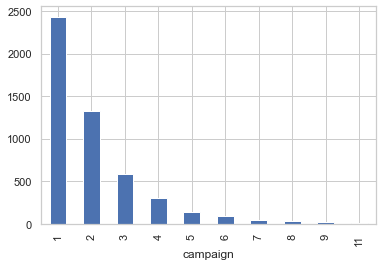

In [12]:
Subs_per_campaign.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(10).plot(kind='bar')

86% of the customers who opened a deposit were only contacted 1 to 3 times.

### Conversion by Age Group

In [13]:
Subscribed_per_age = bank.groupby(by='age_group')['Deposit'].sum()
Approach_per_age = bank.groupby(by='age_group')['Deposit'].count()

In [14]:
Subs_per_age = pd.concat([Subscribed_per_age, Approach_per_age], axis=1)
Subs_per_age['Percentage_Subscribed'] = round(Subscribed_per_age/Approach_per_age * 100, 2)
Subs_per_age.columns = ['Subscribed', 'Approach', 'Percent_Subscribed']
Subs_per_age

,Subscribed,Approach,Percent_Subscribed
age_group,,,
17-24,182,729,24.97
25-34,1725,13852,12.45
35-44,1337,13968,9.57
45-54,869,9372,9.27
55-64,599,4549,13.17
65+,309,723,42.74


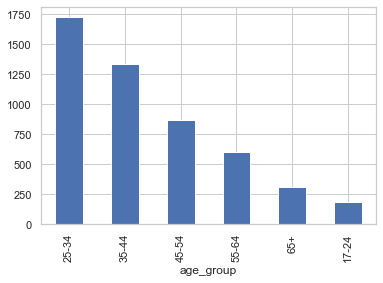

In [15]:
Subs_per_age.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(15).plot(kind='bar')

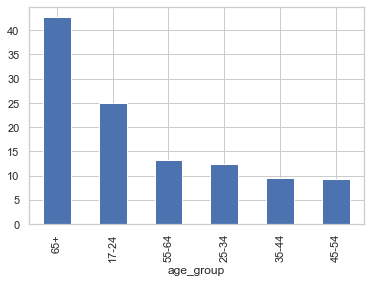

In [16]:
Subs_per_age.sort_values(by='Percent_Subscribed', ascending=False)['Percent_Subscribed'].head(10).plot(kind='bar')

<li>The bank's target market is in the age groups 25-34 and 35-44.</li>
<li>The age group 65+ had the highest number of subscribers at 43%</li>

## Conversion by Education

In [17]:
Subscribed_per_education = bank.groupby(by='education')['Deposit'].sum()

In [18]:
Approach_per_education = bank.groupby(by='education')['Deposit'].count()

In [19]:
Subs_per_education = pd.concat([Subscribed_per_education, Approach_per_education], axis=1)
Subs_per_education['Percent_Subscribed'] = round(Subscribed_per_education/Approach_per_education * 100, 2)
Subs_per_education.columns = ['Subscribed', 'Approach', 'Percent_Subscribed']
Subs_per_education

,Subscribed,Approach,Percent_Subscribed
education,,,
primary,588,6800,8.65
secondary,2441,23131,10.55
tertiary,1992,13262,15.02


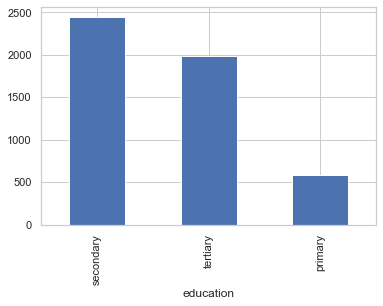

In [20]:
Subs_per_education.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(10).plot(kind='bar')

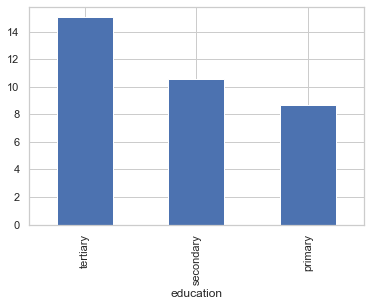

In [21]:
#Sort by percentage subscribed
Subs_per_education.sort_values(by='Percent_Subscribed', ascending=False)['Percent_Subscribed'].head(10).plot(kind='bar')

The bank mainly focused on people who had at least a secondary education, with the highest percentage of customers who opened accounts had a tertiary education.

## Conversion by Job Type

In [22]:
Subscribed_per_job = bank.groupby(by='job')['Deposit'].sum()
Approach_per_job = bank.groupby(by='job')['Deposit'].count()
Subs_per_job = pd.concat([Subscribed_per_job, Approach_per_job], axis=1)
Subs_per_job['Percent_Subscribed'] = round(Subscribed_per_job/Approach_per_job * 100, 2)
Subs_per_job.columns = ['Subscribed', 'Approach', 'Percent_Subscribed']
Subs_per_job

,Subscribed,Approach,Percent_Subscribed
job,,,
admin.,613,5000,12.26
blue-collar,675,9278,7.28
entrepreneur,116,1411,8.22
housemaid,105,1195,8.79
management,1253,9216,13.60
retired,486,2145,22.66
self-employed,182,1540,11.82
services,350,4004,8.74
student,226,775,29.16


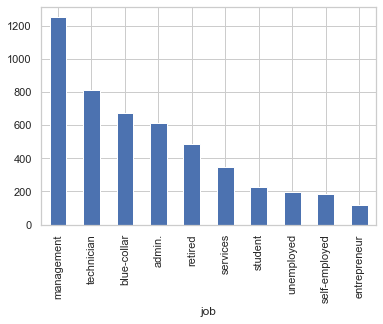

In [23]:
Subs_per_job.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(10).plot(kind='bar')

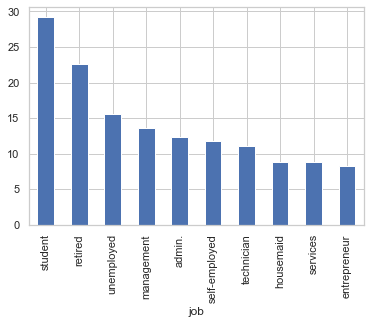

In [24]:
# Sort by the percent of people subscribed.
Subs_per_job.sort_values(by='Percent_Subscribed', ascending=False)['Percent_Subscribed'].head(10).plot(kind='bar')

Two observations here:
<li>The company can consider marketing their products to customers who have blue-collar jobs, because of the large customer base.  However, the percent of people who accepted was the lowest (7.26%)</li>
<li>The group that had the most subs are students and retired people.</li>

## Conversion by Month

In [25]:
Subscribed_per_month = bank.groupby(by='month')['Deposit'].sum()
Approach_per_month = bank.groupby(by='month')['Deposit'].count()
Subs_per_month = pd.concat([Subscribed_per_month, Approach_per_month], axis=1)
Subs_per_month['Percent_Subscribed'] = round(Subscribed_per_month / Approach_per_month * 100, 2)
Subs_per_month.columns = ['Subscribed', 'Approach', 'Percent_Subscribed']
Subs_per_month

,Subscribed,Approach,Percent_Subscribed
month,,,
apr,543,2820,19.26
aug,659,6037,10.92
dec,93,200,46.50
feb,418,2533,16.50
jan,132,1318,10.02
jul,586,6601,8.88
jun,523,4980,10.50
mar,241,448,53.79
may,888,13192,6.73


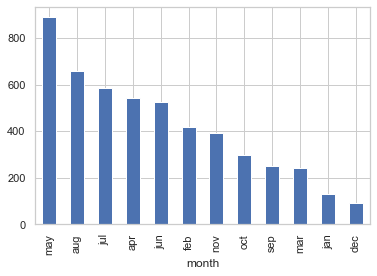

In [26]:
#Sort by number of subscribed
Subs_per_month.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(12).plot(kind='bar')

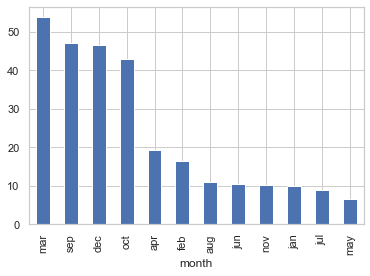

In [27]:
Subs_per_month.sort_values(by='Percent_Subscribed', ascending=False)['Percent_Subscribed'].head(12).plot(kind='bar')

While May, August, and July saw the largest amount of customers, the percentage of people who actually signed up was highest in March, September, December, and October.

### Converstion by Previous

In [29]:
Subscribed_per_previous = bank.groupby(by='previous')['Deposit'].sum()
Approach_per_previous = bank.groupby(by='previous')['Deposit'].count()
Subs_per_previous = pd.concat([Subscribed_per_previous, Approach_per_previous], axis=1)
Subs_per_previous['Percent Subscribed'] = round(Subscribed_per_previous/Approach_per_previous * 100, 2)
Subs_per_previous.columns = ['Subscribed', 'Approached', 'Percent_Subscribed']
Subs_per_previous = Subs_per_previous.loc[0:6, :]
Subs_per_previous

,Subscribed,Approached,Percent_Subscribed
previous,,,
0,3222,35281,9.13
1,538,2651,20.29
2,429,2004,21.41
3,284,1096,25.91
4,166,693,23.95
5,115,443,25.96
6,82,268,30.60


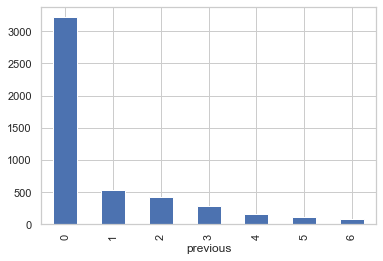

In [30]:
Subs_per_previous.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(12).plot(kind='bar')

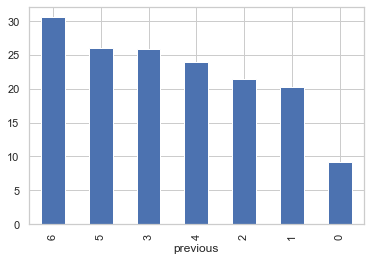

In [31]:
Subs_per_previous.sort_values(by='Percent_Subscribed', ascending=False)['Percent_Subscribed'].head(12).plot(kind='bar')

### Conversion by Pdays

In [32]:
Subscribed_per_pdays = bank.groupby(by='pdays_group')['Deposit'].sum()
Approach_per_pdays = bank.groupby(by='pdays_group')['Deposit'].count()
Subs_per_pdays = pd.concat([Subscribed_per_pdays, Approach_per_pdays], axis=1)
Subs_per_pdays['Pecent_Subscribed'] = round(Subscribed_per_pdays/Approach_per_pdays * 100, 2)
Subs_per_pdays.columns = ['Subscribed', 'Approached', 'Percent_Subscribed']
Subs_per_pdays

,Subscribed,Approached,Percent_Subscribed
pdays_group,,,
1 to 143 days,732,2090,35.02
144 to 282 days,695,3188,21.80
283 to 427 days,285,2443,11.67
More than 428 days,87,191,45.55
Not Previous Contacted,3222,35281,9.13


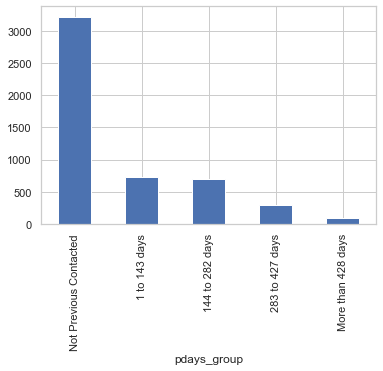

In [33]:
Subs_per_pdays.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(12).plot(kind='bar')

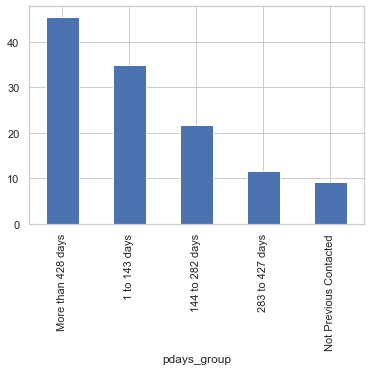

In [35]:
Subs_per_pdays.sort_values(by='Percent_Subscribed', ascending=False)['Percent_Subscribed'].head(12).plot(kind='bar')

The bank should go after their existing customers rather than trying for new ones, although the highest percentage of their new subscribers were contacted over 428 days ago.

### Pdays vs. Previous

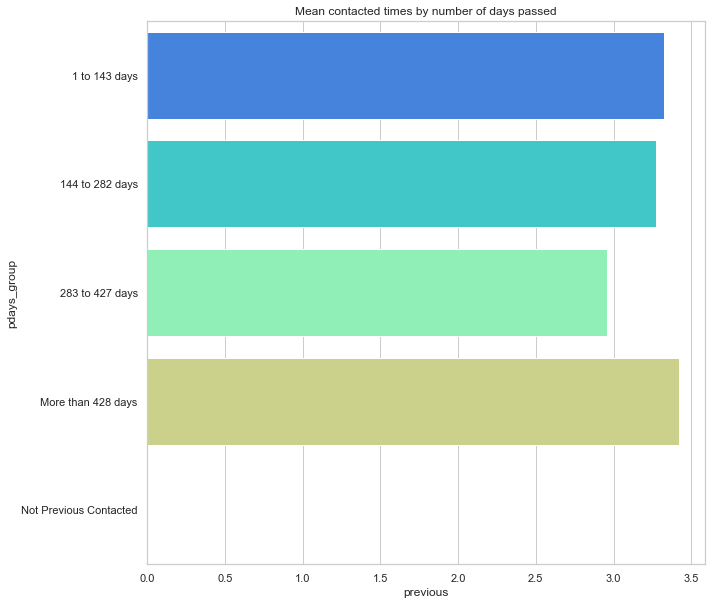

In [36]:
previous_median = bank.groupby(['pdays_group'], as_index=False)['previous'].mean()
fig = plt.figure(figsize=(10, 10))
sns.barplot(x='previous', y='pdays_group', data=previous_median, label='previous', palette='rainbow')
plt.title('Mean contacted times by number of days passed')
plt.show()

<li>The bank needed to contact the customer a minimum of 3 times in order to gain the customer's attention about the product.</li>
<li>When adjusted to percentage graph of subs_per_previous, the bank can increase the attempted contact to 5-6 times.

### Outlier discovery

In [37]:
numeric = ['balance', 'day', 'duration', 'campaign']

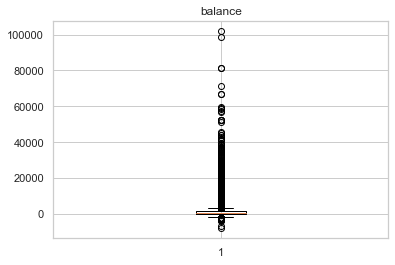

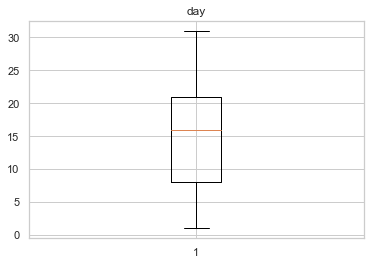

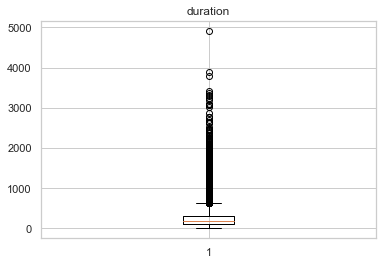

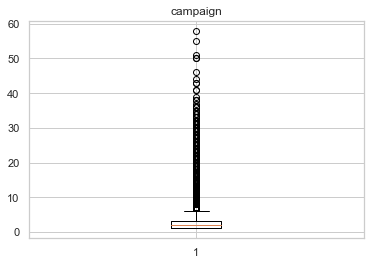

In [39]:
def box_plot(numeric):
    for i in range(len(numeric)):
        plt.boxplot(bank[numeric[i]])
        plt.title(numeric[i])
        plt.show()
box_plot(numeric)

### Balance Distribution

In [40]:
balance_eda = bank[bank['balance'].between(bank['balance'].quantile(.1), bank['balance'].quantile(.9))]

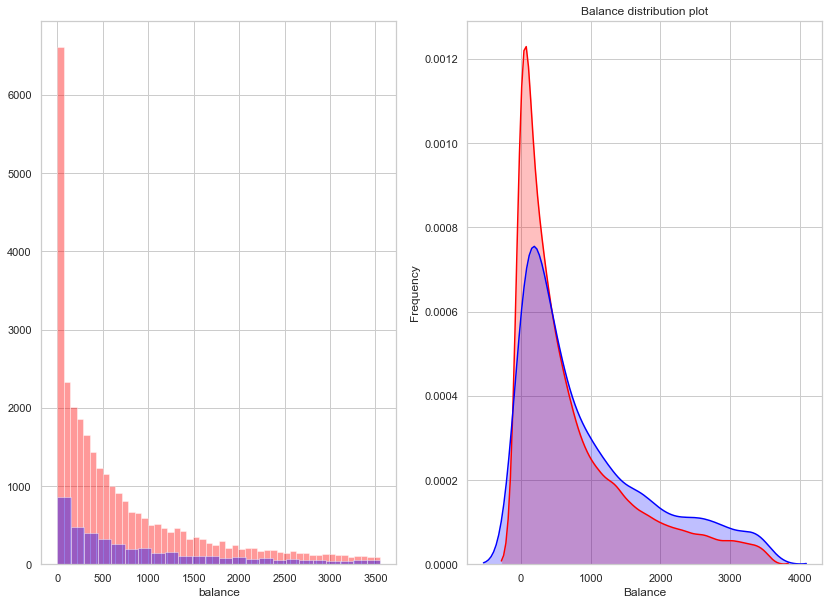

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10))
sns.distplot(balance_eda[balance_eda['y'] == 'no']['balance'], color='red', kde=False, ax=ax[0])
sns.distplot(balance_eda[balance_eda['y'] == 'yes']['balance'], color='blue', kde=False, ax=ax[0])
plt.title('Balance distribution plot')
plt.xlabel('Balance')
plt.ylabel('Frequency')
sns.distplot(balance_eda[balance_eda['y'] == 'no']['balance'], color='red', hist=False, kde_kws={'shade': True}, ax=ax[1])
sns.distplot(balance_eda[balance_eda['y'] == 'yes']['balance'], color='blue', hist=False, kde_kws={'shade': True}, ax=ax[1])
plt.title('Balance distribution plot')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

### Duration Distribution

In [42]:
duration_eda = bank[bank['duration'].between(bank['duration'].quantile(.1), bank['duration'].quantile(.9))]

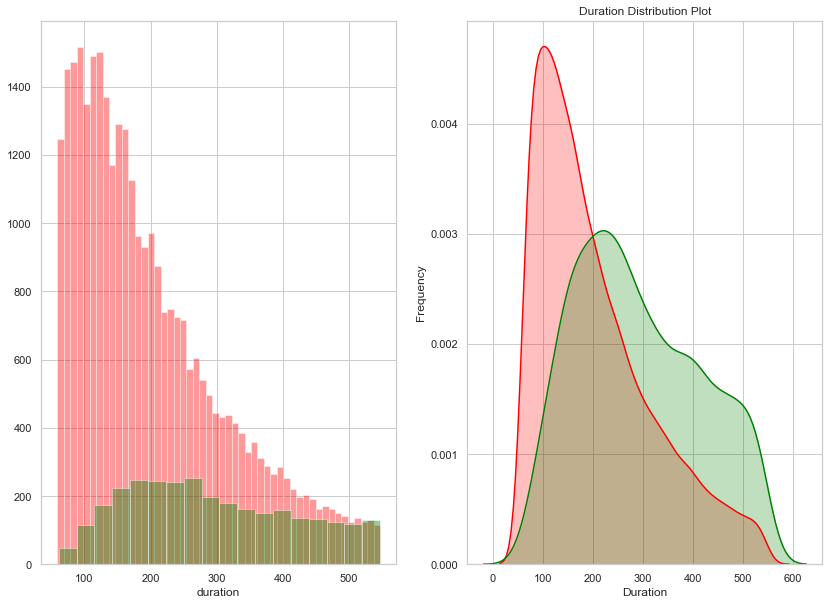

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10))
sns.distplot(duration_eda[duration_eda['y'] == 'no']['duration'], color='red', kde=False, ax=ax[0])
sns.distplot(duration_eda[duration_eda['y'] == 'yes']['duration'], color='green', kde=False, ax=ax[0])
plt.title('Duration Distribution Plot')
plt.xlabel('Duration')
plt.ylabel('Frequency')
sns.distplot(duration_eda[duration_eda['y'] == 'no']['duration'], color='red', hist=False, kde_kws={'shade': True}, ax=ax[1])
sns.distplot(duration_eda[duration_eda['y'] == 'yes']['duration'], color='green', hist=False, kde_kws={'shade': True}, ax=ax[1])
plt.title('Duration Distribution Plot')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

Calls that last under 100 seconds are likely to result in an account not being opened.  However, calls that last from 3 - 6 minutes are more likely to have an account opened.

## Outlier Summary

<b>Balance</b>

In [46]:
balance_low = bank['balance'][bank['balance'] < bank_desc.loc['Low_Out_IQR', 'balance']]
balance_high = bank['balance'][bank['balance'] > bank_desc.loc['High_Out_IQR', 'balance']]
print(f'Balance lower than {bank_desc.loc["Low_Out_IQR", "balance"]} or higher than {bank_desc.loc["High_Out_IQR", "balance"]} is an outlier.')
print(f'Total amount of low outlier is {len(balance_low)} values\nTotal amount of high outlier is {len(balance_high)} values')
print(f'Sum amount of outlier is {len(balance_high) + len(balance_low)} values')

Balance lower than -1940.5 or higher than 3423.5 is an outlier.
Total amount of low outlier is 19 values
Total amount of high outlier is 4526 values
Sum amount of outlier is 4545 values


<b>Duration</b>

In [47]:
duration_low = bank['duration'][bank['duration'] < bank_desc.loc['Low_Out_IQR', 'duration']]
duration_high = bank['duration'][bank['duration'] > bank_desc.loc['High_Out_IQR', 'duration']]
print(f'Duration lower than {bank_desc.loc["Low_Out_IQR", "duration"]} or higher than {bank_desc.loc["High_Out_IQR", "duration"]} is an outlier.')
print(f'Total amount of low outlier is {len(duration_low)} values.\nTotal amount of high outlier is {len(duration_high)} values.')
print(f'Sum amount of outlier is {len(duration_high) + len(duration_low)} values.')

Duration lower than -219.5 or higher than 640.5 is an outlier.
Total amount of low outlier is 0 values.
Total amount of high outlier is 3124 values.
Sum amount of outlier is 3124 values.


<b>Campaign</b>

In [48]:
campaign_low = bank['campaign'][bank['campaign'] < bank_desc.loc['Low_Out_IQR', 'campaign']]
campaign_high = bank['campaign'][bank['campaign'] > bank_desc.loc['High_Out_IQR', 'campaign']]
print(f'Duration lower than {bank_desc.loc["Low_Out_IQR", "campaign"]} or higher than {bank_desc.loc["High_Out_IQR", "campaign"]} is an outlier.')
print(f'Total amount of low outlier is {len(campaign_low)} values.\nTotal amount of high outlier is {len(campaign_high)} values.')
print(f'Sum amount of outlier is {len(campaign_high) + len(campaign_low)} values.')

Duration lower than -2.0 or higher than 6.0 is an outlier.
Total amount of low outlier is 0 values.
Total amount of high outlier is 2900 values.
Sum amount of outlier is 2900 values.


<b>Previous</b>

In [49]:
previous_low = bank['previous'][bank['previous'] < bank_desc.loc['Low_Out_IQR', 'previous']]
previous_high = bank['previous'][bank['previous'] > bank_desc.loc['High_Out_IQR', 'previous']]
print(f'Duration lower than {bank_desc.loc["Low_Out_IQR", "previous"]} or higher than {bank_desc.loc["High_Out_IQR", "previous"]} is an outlier.')
print(f'Total amount of low outlier is {len(previous_low)} values.\nTotal amount of high outlier is {len(previous_high)} values.')
print(f'Sum amount of outlier is {len(previous_high) + len(previous_low)} values.')

Duration lower than 0.0 or higher than 0.0 is an outlier.
Total amount of low outlier is 0 values.
Total amount of high outlier is 7912 values.
Sum amount of outlier is 7912 values.


In [50]:
bank.head(5)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y,age_group,pdays_group,Open_Deposit,Deposit
0,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,0,no,55-64,Not Previous Contacted,no,0
1,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,no,35-44,Not Previous Contacted,no,0
2,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,no,25-34,Not Previous Contacted,no,0
3,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,0,no,35-44,Not Previous Contacted,no,0
4,management,single,tertiary,no,447,yes,yes,cellular,5,may,217,1,0,no,25-34,Not Previous Contacted,no,0


In [51]:
bank = bank.drop(columns=['y', 'Open_Deposit'])

In [52]:
bank.to_csv('Bank_Modeling.csv', index=False)